## Imports and Viz

In [ ]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from google.colab import files
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.layers import RandomContrast, RandomFlip, RandomRotation, BatchNormalization, Activation

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.image import resize

from keras.backend import clear_session
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout




In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# See dataset shape
print('Train Data Shape:', x_train.shape)
print('Test Data Shape:',x_test.shape)
print('Train Targets Shape:',y_train.shape)
print('Test Targets Shape:',y_test.shape)

# One-Hot encoding the Target variables
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Standardizing the Input variables
x_train = (x_train/255).astype(float)
x_test = (x_test/255).astype(float)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Train Data Shape: (50000, 32, 32, 3)
Test Data Shape: (10000, 32, 32, 3)
Train Targets Shape: (50000, 1)
Test Targets Shape: (10000, 1)


## Image Visualisation

In [ ]:


# Cifar-10 offers no labels, we need to write them
"""
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

plt.figure(figsize=(10, 10))

cnt=0
for class_no, class_name in enumerate(class_names):

  indices = (y_train.flatten() == class_no)

  nums = np.random.randint(0, sum(indices), size=10).tolist()

  images = x_train[indices][nums]

  for image in images:
    cnt+=1
    plt.subplot(10, 10, cnt)

    plt.imshow(image)
    if cnt in range(1,100,10):
      plt.title(f"{class_name}s")

    plt.axis('off')

plt.tight_layout()
plt.show()
"""


'\nclass_names = [\n    \'airplane\', \'automobile\', \'bird\', \'cat\', \'deer\',\n    \'dog\', \'frog\', \'horse\', \'ship\', \'truck\'\n]\n\nplt.figure(figsize=(10, 10))\n\ncnt=0\nfor class_no, class_name in enumerate(class_names):\n\n  indices = (y_train.flatten() == class_no)\n\n  nums = np.random.randint(0, sum(indices), size=10).tolist()\n\n  images = x_train[indices][nums]\n\n  for image in images:\n    cnt+=1\n    plt.subplot(10, 10, cnt)\n\n    plt.imshow(image)\n    if cnt in range(1,100,10):\n      plt.title(f"{class_name}s")\n\n    plt.axis(\'off\')\n\nplt.tight_layout()\nplt.show()\n'

## M1 - 55%

- Conv(32,32,3)
- MaxPool
- Dense(100)
- Optimizer:SGD
- Epochs: 50
- Batch size: 512.

In [ ]:
clear_session()
m1 = Sequential()
m1.add(Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)))
m1.add(MaxPooling2D(2,2))
m1.add(Flatten())
m1.add(Dense(100, activation="relu"))
m1.add(Dense(10, activation="softmax"))

m1.compile(
    optimizer="sgd",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

m1_history = m1.fit(x_train,
                 y_train,
                 epochs= 50,
                 batch_size=512,
                 validation_split=0.1)

###################################
test_loss, test_acc = m1.evaluate(x_test, y_test)
print('M1 Test accuracy:', test_acc)

m1_pred = m1.predict(x_test)
m1_pred = np.argmax(m1_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

confusion_matrix(m1_pred, y_true)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.1610 - loss: 2.2682 - val_accuracy: 0.2592 - val_loss: 2.1347
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2647 - loss: 2.1001 - val_accuracy: 0.2864 - val_loss: 2.0138
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3016 - loss: 1.9864 - val_accuracy: 0.3184 - val_loss: 1.9507
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3253 - loss: 1.9285 - val_accuracy: 0.3284 - val_loss: 1.9019
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3428 - loss: 1.8847 - val_accuracy: 0.3542 - val_loss: 1.8660
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3583 - loss: 1.8482 - val_accuracy: 0.3534 - val_loss: 1.8407
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3656 - loss: 1.8205 - val_accuracy: 0.3712 - val_loss: 1.8187
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3778 - loss: 1.7957 - val_accuracy: 0.3800 - v

array([[672,  44, 101,  34,  50,  24,   7,  24, 173,  54],
       [ 66, 742,  26,  32,  17,  11,  22,  20,  95, 203],
       [ 41,   4, 359,  58, 139,  55,  48,  31,  14,   9],
       [ 13,   6,  44, 314,  44, 135,  48,  41,  13,  16],
       [ 10,   4,  99,  49, 378,  53,  49,  36,   5,   6],
       [ 17,   4, 114, 221,  80, 476,  37,  85,  15,  15],
       [ 28,  25, 133, 154, 141,  78, 722,  42,  10,  34],
       [ 24,  17,  86,  87, 131, 139,  43, 667,  16,  44],
       [ 79,  31,  22,  12,   9,  14,   8,   6, 601,  30],
       [ 50, 123,  16,  39,  11,  15,  16,  48,  58, 589]])

## M2 - 58%

- 2 x Conv(32,32,3)
- MaxPool
- Dense(128)
- Optimizer:SGD
- Epochs: 50
- Batch size: 512




In [ ]:
clear_session()

m2 = Sequential()
m2.add(Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)))
m2.add(Conv2D(32, (3,3), activation="relu", padding="same"))
m2.add(MaxPooling2D((2,2)))
m2.add(Flatten())
m2.add(Dense(128, activation="relu"))
m2.add(Dense(10, activation="softmax"))

m2.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

m2_history = m2.fit(x_train,
                    y_train,
                    batch_size=512,
                    epochs=50,
                    validation_split=0.1)


###################################
test_loss, test_acc = m2.evaluate(x_test, y_test)
print('M2 Test accuracy:', test_acc)

m2_pred = m2.predict(x_test)
m2_pred = np.argmax(m2_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion_matrix(m2_pred, y_true)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.1571 - loss: 2.2698 - val_accuracy: 0.2300 - val_loss: 2.1456
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2499 - loss: 2.1017 - val_accuracy: 0.2950 - val_loss: 2.0112
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2918 - loss: 1.9968 - val_accuracy: 0.3018 - val_loss: 1.9684
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3265 - loss: 1.9264 - val_accuracy: 0.3436 - val_loss: 1.8739
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3494 - loss: 1.8662 - val_accuracy: 0.3598 - val_loss: 1.8294
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3729 - loss: 1.8110 - val_accuracy: 0.3468 - val_loss: 1.8591
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3700 - loss: 1.7923 - val_accuracy: 0.3594 - val_loss: 1.8175
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3839 - loss: 1.7589 - val_accuracy: 0.3770 - 

array([[626,  32,  63,  18,  35,  10,   2,  15, 101,  38],
       [ 16, 602,   5,   8,   1,   2,  11,   3,  43,  79],
       [ 79,  15, 439,  74,  96,  67,  59,  34,  28,  14],
       [ 13,  15,  55, 353,  48, 154,  50,  48,  20,  29],
       [ 26,   6, 121,  79, 490,  76,  69,  44,  19,   9],
       [ 12,  10,  75, 187,  51, 466,  33,  59,  11,  12],
       [ 26,  19, 104, 135, 121,  76, 718,  26,  17,  27],
       [ 35,  21,  95,  97, 137, 124,  32, 729,  14,  55],
       [ 94,  43,  18,  14,  11,   9,  10,   8, 669,  30],
       [ 73, 237,  25,  35,  10,  16,  16,  34,  78, 707]])

## M4 - 78% Test Accuracy

- Conv(32,32,3)
- MaxPool
- Dropout
- Conv(64,64,3)
- MaxPool
- Dropout
- Dense(128)
- Dropout

- Optimizer:SGD -> Learning Rate 0.01, Momentum 0.9
- Epochs: 50
- Batch size: 512

In [ ]:

clear_session()

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

x_train = (x_train/255).astype(float)
x_test = (x_test/255).astype(float)


m4 = Sequential()
m4.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
m4.add(Conv2D(32, (3,3), activation='relu', padding='same'))
m4.add(MaxPooling2D((2,2)))
m4.add(Dropout(0.2))

m4.add(Conv2D(64, (3,3), activation='relu', padding='same'))
m4.add(Conv2D(64, (3,3), activation='relu', padding='same'))
m4.add(MaxPooling2D((2,2)))
m4.add(Dropout(0.2))

m4.add(Flatten())
m4.add(Dense(128, activation='relu'))
m4.add(Dropout(0.5))
m4.add(Dense(10, activation='softmax'))




#opt = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

m4.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

m4_history = m4.fit(x_train,
                    y_train,
                    batch_size=512,
                    epochs=50,
                    validation_split=0.1)


test_loss, test_acc = m4.evaluate(x_test, y_test)
print('M4 Test accuracy:', test_acc)

m4_pred = m4.predict(x_test)
m4_pred = np.argmax(m4_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

confusion_matrix(m4_pred, y_true)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - accuracy: 0.2106 - loss: 2.1238 - val_accuracy: 0.4296 - val_loss: 1.5378
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4225 - loss: 1.6029 - val_accuracy: 0.5182 - val_loss: 1.3211
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4785 - loss: 1.4358 - val_accuracy: 0.5706 - val_loss: 1.2111
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5263 - loss: 1.3242 - val_accuracy: 0.5884 - val_loss: 1.1638
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5575 - loss: 1.2429 - val_accuracy: 0.6288 - val_loss: 1.0585
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5759 - loss: 1.1870 - val_accuracy: 0.6550 - val_loss: 0.9808
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6025 - loss: 1.1244 - val_accuracy: 0.6704 - val_loss: 0.9412
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6159 - loss: 1.0863 - val_accuracy: 0.6798 - 

array([[838,  16,  69,  24,  19,  14,   4,  17,  35,  32],
       [  9, 878,   4,   4,   0,   2,   4,   1,  19,  60],
       [ 27,   2, 627,  49,  46,  33,  33,  25,   5,   4],
       [ 16,   7,  48, 605,  45, 171,  54,  24,   5,   4],
       [ 10,   4, 104,  67, 788,  54,  60,  51,   3,   6],
       [  0,   3,  44, 142,  19, 653,  10,  35,   2,   2],
       [  7,   5,  51,  46,  21,  14, 815,   2,   4,   2],
       [  6,   0,  26,  28,  46,  42,   4, 837,   1,   6],
       [ 60,  29,  20,  21,  13,  11,  10,   2, 914,  20],
       [ 27,  56,   7,  14,   3,   6,   6,   6,  12, 864]])

## M5 - 67% test acc

- Transfer Learning with VGG16
- Dense(256)
- Dropout

In [ ]:
clear_session()
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


x_train_resized = tf.image.resize(x_train, (64, 64))
x_test_resized = tf.image.resize(x_test, (64, 64))

x_train_resized = tf.cast(x_train_resized, tf.float32) / 255.0
x_test_resized = tf.cast(x_test_resized, tf.float32) / 255.0


base_model = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(64, 64, 3)   # instead of 224x224
)

for layer in base_model.layers:
    layer.trainable = False


m5 = Sequential()
m5.add(base_model)
m5.add(Flatten())
m5.add(Dense(256, activation='relu'))
m5.add(Dropout(0.5))
m5.add(Dense(10, activation='softmax'))


opt = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

m5.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


m5_history = m5.fit(
    x_train_resized, y_train,
    batch_size=64,
    epochs=20,
    validation_split=0.1
)


test_loss, test_acc = m5.evaluate(x_test_resized, y_test)
print('M5 Test accuracy:', test_acc)

m5_pred = m5.predict(x_test_resized)
m5_pred = np.argmax(m5_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

confusion_matrix(m5_pred, y_true)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.2809 - loss: 2.0353 - val_accuracy: 0.5322 - val_loss: 1.4289
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.4803 - loss: 1.5024 - val_accuracy: 0.5722 - val_loss: 1.2744
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.5347 - loss: 1.3514 - val_accuracy: 0.5982 - val_loss: 1.1847
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.5586 - loss: 1.2774 - val_accuracy: 0.6160 - val_loss: 1.1387
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.5800 - loss: 1.2221 - val_accuracy: 0.6278 - val_loss: 1.0945
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.5960 - loss: 1.1768 - val_accuracy: 0.6328 - val_loss: 1.0777
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.6015 - loss: 1.1495 - val_accuracy: 0.6320 - val_loss: 1.0535
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.6086 - loss: 1.1323 - 

array([[743,  27,  72,  32,  24,  10,   9,  12,  80,  47],
       [ 15, 760,   8,  27,   9,  13,  13,   8,  32,  81],
       [ 75,   8, 658, 111, 132,  89,  97,  64,  30,   9],
       [ 17,  20,  50, 481,  71, 164,  62,  42,  18,  30],
       [ 14,   2,  62,  29, 524,  31,  35,  47,   6,   6],
       [  3,  13,  41, 133,  35, 557,  36,  62,   3,   9],
       [ 10,  17,  80, 105,  95,  49, 731,  14,   8,   8],
       [ 18,  10,  21,  38,  79,  66,   4, 721,   6,  15],
       [ 73,  38,   6,  13,  18,   6,   7,  11, 794,  41],
       [ 32, 105,   2,  31,  13,  15,   6,  19,  23, 754]])

## M6 - 82%
- VGG style architecture
- Data Augmentation
- Batch normalization after each layer block
- Large dropout before flattening


In [ ]:
clear_session()

num_classes = 10
#input_shape = (32, 32, 3)
from tensorflow.keras.layers import RandomContrast,RandomFlip,RandomRotation,BatchNormalization

m6 = Sequential()
m6.add(RandomContrast(factor=0.10, input_shape=(32, 32, 3)))
m6.add(RandomFlip(mode='horizontal'))
m6.add(RandomRotation(factor=0.10))
#m6.add(BatchNormalization())

m6.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'))
m6.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'))
m6.add(MaxPooling2D(pool_size=(2, 2)))
m6.add(BatchNormalization())

m6.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same'))
m6.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same'))
m6.add(MaxPooling2D(pool_size=(2, 2)))
m6.add(BatchNormalization())

m6.add(Conv2D(256, kernel_size=(3, 3), activation="relu", padding='same'))
m6.add(Conv2D(256, kernel_size=(3, 3), activation="relu", padding='same'))
m6.add(MaxPooling2D(pool_size=(2, 2)))
m6.add(BatchNormalization())

m6.add(Flatten())
m6.add(Dense(128, activation='relu'))
m6.add(Dropout(0.5))
m6.add(Dense(num_classes, activation="softmax"))


m6.compile(loss='categorical_crossentropy',
              optimizer='Adam',
           metrics=['accuracy'])

m6_history = m6.fit(x_train,
                  y_train,
                  batch_size=512,
                  epochs=25,
                  verbose=1,
                  validation_split=0.1)

Epoch 1/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 21s 142ms/step - accuracy: 0.2908 - loss: 2.0808 - val_accuracy: 0.0978 - val_loss: 2.4152
Epoch 2/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.4593 - loss: 1.5100 - val_accuracy: 0.0976 - val_loss: 6.9708
Epoch 3/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.5393 - loss: 1.3022 - val_accuracy: 0.0976 - val_loss: 8.7559
Epoch 4/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.6012 - loss: 1.1363 - val_accuracy: 0.0980 - val_loss: 9.4302
Epoch 5/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.6454 - loss: 1.0342 - val_accuracy: 0.1206 - val_loss: 6.2793
Epoch 6/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.6772 - loss: 0.9435 - val_accuracy: 0.2682 - val_loss: 3.4215
Epoch 7/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.7026 - loss: 0.8784 - val_accuracy: 0.4944 - val_loss: 1.7805
Epoch 8/25
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.7181 - loss: 0.8226 - val_accuracy: 0.7128

In [ ]:
test_loss, test_acc = m6.evaluate(x_test, y_test)
print('M6 Test accuracy:', test_acc)

m6_pred = m6.predict(x_test)
m6_pred = np.argmax(m6_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

confusion_matrix(m6_pred, y_true)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8297 - loss: 0.5560
M6 Test accuracy: 0.824999988079071
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[840,  11,  39,  17,  10,   2,   6,  10,  76,  20],
       [ 16, 939,   2,   1,   0,   3,   1,   0,  17,  60],
       [ 48,   2, 837,  87,  72,  65,  22,  33,  15,   7],
       [ 21,   4,   8, 598,  11,  90,   8,  14,   9,   3],
       [ 14,   1,  34,  77, 837,  49,  11,  82,  12,   8],
       [  1,   0,  12,  72,   3, 727,   3,  22,   2,   1],
       [ 12,   6,  55, 120,  54,  44, 941,  18,  10,  13],
       [  9,   1,  11,  15,  10,  15,   3, 815,   4,   8],
       [ 17,   7,   0,   9,   1,   1,   1,   3, 842,   6],
       [ 22,  29,   2,   4,   2,   4,   4,   3,  13, 874]])

## M7 - 88%
- Transfer Learning from MobileNetV2
- Learning of added layers
- Fine Tuning for last 50 layes of MobileNet architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.backend import clear_session

clear_session()

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Resize & Normalize ---
x_train = tf.image.resize(x_train, (96, 96))
x_test = tf.image.resize(x_test, (96, 96))
x_train = tf.cast(x_train, tf.float32) / 255.0
x_test = tf.cast(x_test, tf.float32) / 255.0

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)



# Base model
base_model = MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(96, 96, 3)
)
base_model.trainable = False  # freeze at start

# Build classifier
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

# Compile
opt = Adam(learning_rate=1e-4)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)
checkpoint = ModelCheckpoint('mobilenetv2_cifar10_best.keras', monitor='val_accuracy',
                             save_best_only=True, verbose=1)

# Phase 1: Train top layers
history_1 = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    validation_data=(x_test, y_test),
    epochs=20,
    callbacks=[early_stop, reduce_lr, checkpoint],
    verbose=1
)

# Phase 2: Fine-tune
base_model.trainable = True

# Unfreeze deeper layers (optional: only last 50)
for layer in base_model.layers[:-50]:
    layer.trainable = False

opt_finetune = Adam(learning_rate=1e-5)
model.compile(optimizer=opt_finetune, loss='categorical_crossentropy', metrics=['accuracy'])

transfer_history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    validation_data=(x_test, y_test),
    epochs=15,
    callbacks=[early_stop, reduce_lr, checkpoint],
    verbose=1
)

# Evaluate final model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"✅ Final Test Accuracy: {test_acc:.3f}")
print(f"✅ Final Test loss: {test_loss:.3f}")
files.download("mobilenetv2_cifar10_best.keras")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.3314 - loss: 2.1135
Epoch 1: val_accuracy improved from -inf to 0.69640, saving model to mobilenetv2_cifar10_best.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 156s 177ms/step - accuracy: 0.3316 - loss: 2.1129 - val_accuracy: 0.6964 - val_loss: 0.9097 - learning_rate: 1.0000e-04
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.5777 - loss: 1.2178
Epoch 2: val_accuracy improved from 0.69640 to 0.72430, saving model to mobilenetv2_cifar10_best.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 113s 144ms/step - accuracy: 0.5777 - loss: 1.2177 - val_accuracy: 0.7243 - val_loss: 0.8133 - learning_rate: 1.0000e-04
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.6144 - loss: 1.1064
Epoch 3: val_accuracy improved from 0.72430 to 0.74010, saving model to mobilenetv2_cifar10_best.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 112s 143ms/step - accuracy: 0.6144 - loss: 1.1064 - val_accuracy: 0.7401 - val_loss: 0.7614 - learning_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Saving the Winner Transfer Learning Model - M7

In [ ]:
model.save('mobilenetv2_cifar10.h5')
files.download("mobilenetv2_cifar10.h5")

model.save('mobilenetv2_cifar10.keras')
files.download("mobilenetv2_cifar10.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/mobilenetv2_cifar10.keras')

## M7 Performance Metrics

Training Results after 20 iterations
accuracy :  0.7062600255012512
loss :  0.8323919773101807
val_accuracy :  0.7939000129699707
val_loss :  0.6156452894210815
learning_rate :  9.999999747378752e-05


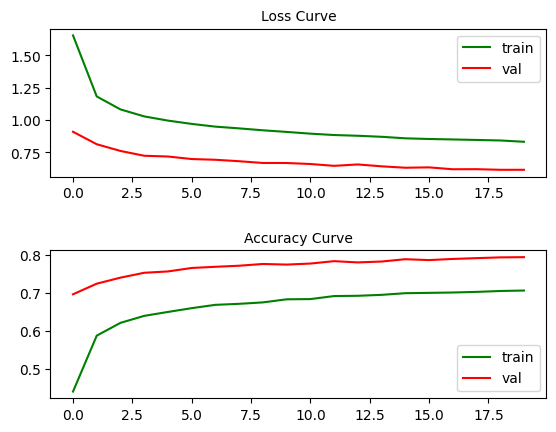

In [ ]:
def performance_curves(history):

  iterations1 = len(history.history[ next(iter(history.history))])

  print(f"Training Results after {iterations1} iterations")
  for i in history.history.keys():
    print(i,': ', history.history[i][-1])

  plt.subplot(211)
  plt.title("Loss Curve", fontsize=10)
  plt.plot(history.history['loss'], color='green', label='train' )
  plt.plot(history.history['val_loss'], color='red', label='val' )
  plt.legend()

  plt.subplot(212)
  plt.title("Accuracy Curve", fontsize=10)
  plt.plot(history.history['accuracy'], color='green', label='train' )
  plt.plot(history.history['val_accuracy'], color='red', label='val' )
  plt.legend()

  plt.subplots_adjust(hspace=0.5)
  plt.show()

performance_curves(history_1)

Tuning Results after 15 iterations
accuracy :  0.862500011920929
loss :  0.40240952372550964
val_accuracy :  0.8859999775886536
val_loss :  0.33990874886512756
learning_rate :  9.999999747378752e-06


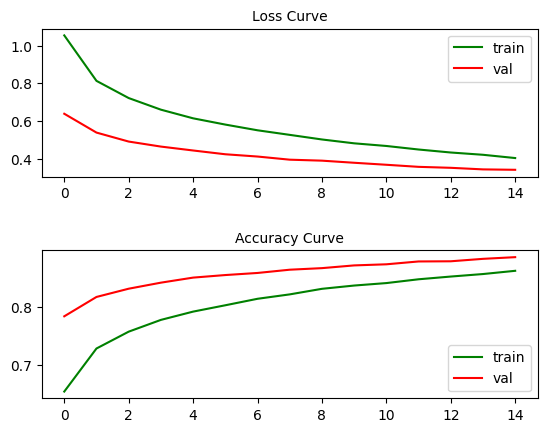

In [ ]:
performance_curves(transfer_history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


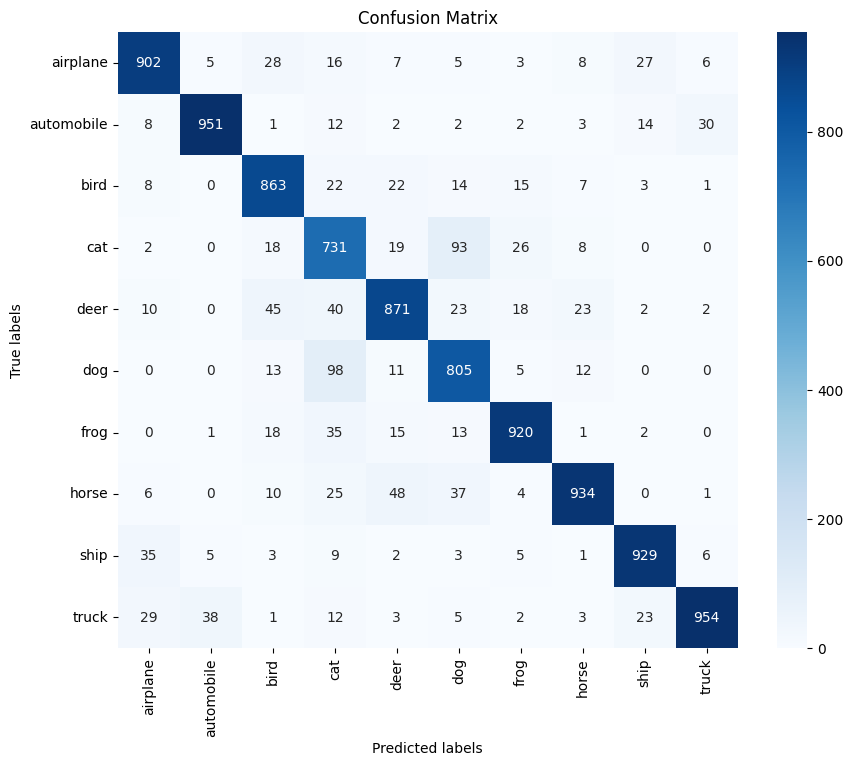

In [ ]:
m7_pred = model.predict(x_test)
m7_pred = np.argmax(m7_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(m7_pred, y_true)


class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()